# PCA: Principal Components Analysis - Análisis de Componentes Principales

## Incicialización del entorno

In [1]:
import numpy as np
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

Populating the interactive namespace from numpy and matplotlib


**Primer paso: simular un conjunto de datos (con n=40 muestras y d=3 variables)**

In [2]:
np.random.seed(23423784) # random seed for consistency

mu_vec1 = np.array([0,4,0])
cov_mat1 = np.array([[3,0,0],[0,6,0],[0,0,3]])#np.array([[1,0,0],[0,2,0],[0,0,2]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

mu_vec2 = np.array([-3,-3,7])
cov_mat2 = np.array([[3,2,0],[2,5,-2],[0,-2,3]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

In [3]:
all_samples = np.concatenate((class1_sample, class2_sample))

**Visualizar**

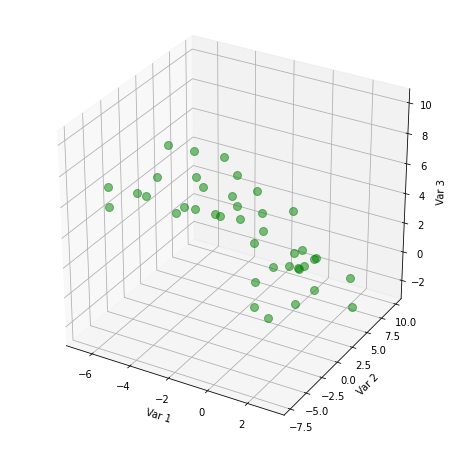

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(all_samples[:,0], all_samples[:,1], all_samples[:,2], 'o', markersize=8, color='green', alpha=0.5, label='class1')
ax.set_xlabel('Var 1')
ax.set_ylabel('Var 2')
ax.set_zlabel('Var 3')
plt.show()

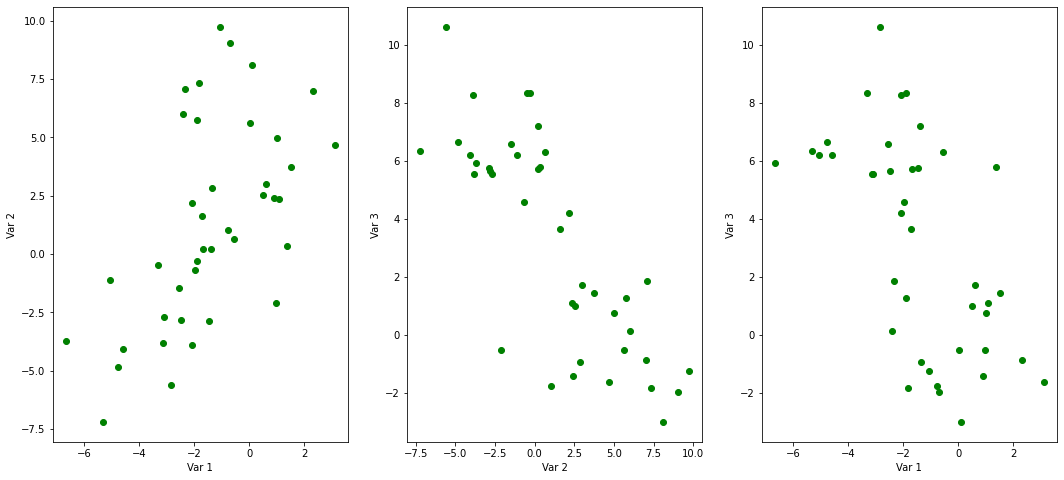

In [5]:
#fig, axs = plt.subplots(nrows=1, ncols=2)#Otra variable usada es f
fig, axs = plt.subplots(1,3,figsize=(18,8))#ancho,altura

axs[0].scatter(all_samples[:,0], all_samples[:,1],color='green')
axs[0].set_xlabel('Var 1')
axs[0].set_ylabel('Var 2')
axs[1].scatter(all_samples[:,1], all_samples[:,2],color='green')
axs[1].set_xlabel('Var 2')
axs[1].set_ylabel('Var 3')
axs[2].scatter(all_samples[:,0], all_samples[:,2],color='green')
axs[2].set_xlabel('Var 1')
axs[2].set_ylabel('Var 3')
plt.show()

In [6]:
print(all_samples.shape)
print(all_samples)

(40, 3)
[[ 3.10150078  4.6788354  -1.62952648]
 [ 0.10419009  8.09950315 -3.00882539]
 [ 0.60135217  3.01205217  1.72959783]
 [-1.06291099  9.7417859  -1.25675335]
 [ 0.0264408   5.60940307 -0.53671699]
 [-0.78063886  1.03962737 -1.76960388]
 [ 2.30441229  7.00494773 -0.87095198]
 [-1.88645958  5.7407628   1.25919744]
 [ 1.52523571  3.72889617  1.42581896]
 [-1.83956727  7.34218133 -1.82530314]
 [ 0.98004525 -2.12165185 -0.53684481]
 [ 0.91410133  2.39263256 -1.43006198]
 [-2.41872986  5.99882027  0.1163464 ]
 [-1.33820956  2.84275117 -0.92977761]
 [ 1.00711076  4.98427785  0.74656954]
 [-0.70576289  9.06133453 -1.97743836]
 [-2.33647946  7.07607009  1.83836835]
 [ 1.08719713  2.35150836  1.10037748]
 [ 0.51820687  2.52028392  0.99477943]
 [-1.71395357  1.60874843  3.64515671]
 [-1.67513277  0.22761311  5.70265846]
 [-2.08888547 -3.88554143  8.26569687]
 [-3.32808317 -0.46419408  8.34008586]
 [-1.39645635  0.21119777  7.21750584]
 [-3.07936795 -2.70541789  5.5315379 ]
 [-5.0659678  -1.

## PCA: Principal Components Analysis - Análisis de Componentes Principales

* Sea X (tamaño $n\times d$): el dataset completo con n muestras en $R^d$ (d variables) 

$$X =\begin{bmatrix}
x_{11} & \cdots &  x_{1d}\\
\vdots & \ddots & \vdots \\
x_{n1} & \cdots &  x_{nd}
\end{bmatrix} = \begin{bmatrix}
x_{1}\\
\vdots  \\
x_{n}
\end{bmatrix} $$

donde cada $x_i =(x_{i1}, \cdots ,  x_{id} )$


Notar que NO se considera ningún target y.


* Calcula el vector promedio d-dimensional (en $R^d$, un vector conteniendo la media de cada variable/columna).

$$\overline{x}=\frac{1}{n} \sum_{i=1}^n x_i = \frac{1}{n} \sum_{i=1}^{n}(x_{i1}, \cdots ,  x_{id} )=(\frac{1}{n} \sum_{i=1}^{n}x_{i1}, \cdots ,  \frac{1}{n} \sum_{i=1}^{n}x_{id} )$$



$$\overline{x}=(\overline{x_1}, \cdots ,\overline{x_d} )$$


* Se consideran los datos centrados $X_c$: cada observación (fila) se le resta el vector de medias (es lo mismo que a cada columna se le reste la media de la columna).

$$X_c =\begin{bmatrix}
(x_{11}-\overline{x_1}) & \cdots &  (x_{1d}-\overline{x_d})\\
\vdots & \ddots & \vdots \\
(x_{n1}-\overline{x_1}) & \cdots &  (x_{nd}- \overline{x_d})
\end{bmatrix} = \begin{bmatrix}
(x_{1}-\overline{x})\\
\vdots  \\
(x_{n}-\overline{x})
\end{bmatrix} $$

donde cada $x_i =(x_{i1}, \cdots ,  x_{id} )$



**Calcular el centro y el dataset centrado**

In [7]:
mean_x = np.mean(all_samples[:,0])
mean_y = np.mean(all_samples[:,1])
mean_z = np.mean(all_samples[:,2])

mean_vector = np.array([mean_x,mean_y,mean_z])

print('Mean Vector /centro (de masa) de las muestras:\n', mean_vector)


all_samples_centered=np.zeros(all_samples.shape)
all_samples_centered[:,0]=all_samples[:,0]-mean_x
all_samples_centered[:,1]=all_samples[:,1]-mean_y
all_samples_centered[:,2]=all_samples[:,2]-mean_z

Mean Vector /centro (de masa) de las muestras:
 [-1.43640671  1.26881422  3.17196103]


* Se calcula la matriz de var-covarianzas de todo el dataset. 
$$\Sigma= \frac{1}{n-1}X_c^{t}. X_c$$

 utilizando la de dispersión (scatter matrix): $$S= X_c^{t}. X_c$$

- Representa la dispersión de los datos alrededor del vector promedio. 

**Matriz de dispersión (scater_matrix) y marriz de covarianza:**

In [8]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[0]):
    #scatter_matrix += ((all_samples[i,:] - mean_vector).reshape(3,1)).dot((all_samples[i,:] - mean_vector).reshape(1,3))
    scatter_matrix += ((all_samples_centered[i,:] ).reshape(3,1)).dot((all_samples_centered[i,:] ).reshape(1,3))
print('Scatter Matrix:\n', scatter_matrix)
cov_matrix=scatter_matrix/(40-1)
print('Covariance Matrix:\n', cov_matrix)

Scatter Matrix:
 [[ 182.89015736  209.69080699 -188.09464145]
 [ 209.69080699  735.1210342  -499.77937389]
 [-188.09464145 -499.77937389  535.02382974]]
Covariance Matrix:
 [[  4.68949121   5.37668736  -4.82293952]
 [  5.37668736  18.84925729 -12.81485574]
 [ -4.82293952 -12.81485574  13.71855974]]


In [9]:
cov_mat = np.cov([all_samples[:,0],all_samples[:,1],all_samples[:,2]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[  4.68949121   5.37668736  -4.82293952]
 [  5.37668736  18.84925729 -12.81485574]
 [ -4.82293952 -12.81485574  13.71855974]]


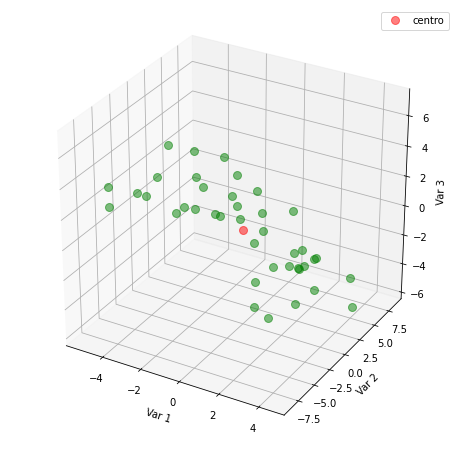

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(all_samples_centered[:,0], all_samples_centered[:,1], all_samples_centered[:,2], 'o', markersize=8, color='green', alpha=0.5)
ax.plot([0], [0], [0], 'o', markersize=8, color='red', alpha=0.5, label='centro')
ax.legend()
ax.set_xlabel('Var 1')
ax.set_ylabel('Var 2')
ax.set_zlabel('Var 3')
plt.show()


* Se calculan los ejes de dispersión ortogonales:
- Los vectores $v_1,v_2,...,v_d$ (en $R^{d}$, de norma 1) y sus valores propios $\lambda_1,\lambda_2,...,\lambda_d$
- $\lambda_1,\lambda_2,...,\lambda_d$: Valores propios ordenados de forma decreciente.
*Se eligen los primeros $k$  (con $k<d$).
- Estos vectores definen un nuevo espacio de dimensión $k$.
- Se construye una matriz $W$ (tamaño $d\times k$) donde cada columna es un vector propio normalizado (de norma o longitud 1).


**Cálculo de Vectores y valores propios (aurovectores y autovalores) de ambas matrices** 

Notar que:
* los vectores propios son ortogonales y de norma (o longitud) 1
* los vectores propios de ambas matrices coinciden y los valores propios son proporcionales según el factor (n-1)

In [ ]:
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(3,1)#ver
    eigvec_cov = eig_vec_cov[:,i].reshape(3,1) #ver
    assert eigvec_sc.all() == eigvec_cov.all(), 'Autovectores no son idénticos'
    norma=sum(eigvec_cov*eigvec_cov)**0.5

    print('Autovector {} de scatter o cov matrix: \n{}'.format(i+1, eigvec_sc))
    print('Norma de autovector {}: {}'.format(i+1, norma))
    print('Autovalor nro {} de scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Autovalor  nro {} de covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Factor de escala de los autovalores o valores propios: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Autovector 1 de scatter o cov matrix: 
[[-0.26165659]
 [-0.74455157]
 [ 0.61414883]]
Norma de autovector 1: 1.0
Autovalor nro 1 de scatter matrix: 1221.059032925254
Autovalor  nro 1 de covariance matrix: 31.309205972442435
Factor de escala de los autovalores o valores propios:  38.99999999999997
----------------------------------------
Autovector 2 de scatter o cov matrix: 
[[-0.86694966]
 [-0.09835071]
 [-0.48859536]]
Norma de autovector 2: 1.0
Autovalor nro 2 de scatter matrix: 100.67208766066376
Autovalor  nro 2 de covariance matrix: 2.581335581042664
Factor de escala de los autovalores o valores propios:  38.99999999999995
----------------------------------------
Autovector 3 de scatter o cov matrix: 
[[-0.42418642]
 [ 0.66028032]
 [ 0.61975462]]
Norma de autovector 3: 1.0
Autovalor nro 3 de scatter matrix: 131.30390071409622
Autovalor  nro 3 de covariance matrix: 3.3667666849768243
Factor de escala de los autovalores o valores propios:  39.00000000000002
--------------------------

**Confirmación que son vectores y valores propios de scatter_matrix: (puede omitirse este bloque)**

In [ ]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,[i]].reshape(3,1)
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
    #print(scatter_matrix.dot(eigv)- eig_val_sc[i] * eigv)    

**Gráfico de vectores propios = nuevas componentes**

[ -9.14323752 -26.0173533   21.46060502]
[-8.69858113 -0.98680662 -4.90234501]
[-4.86066366  7.56601442  7.10163892]


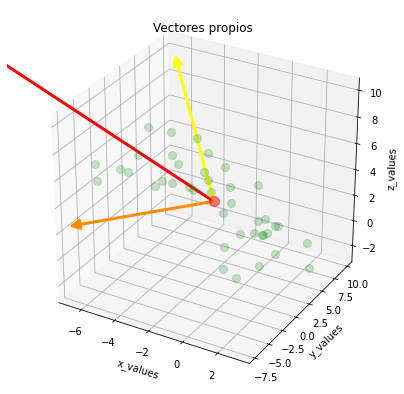

In [ ]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[:,0], all_samples[:,1], all_samples[:,2], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)

colr=["r", "darkorange","yellow"]

for i in range(len(eig_val_sc)):
    v=sqrt(eig_val_sc[i])*eig_vec_sc[:,i]
    print(v)
    co=colr[i]
    a = Arrow3D([mean_x, (mean_x+v[0])], [mean_y,(mean_y+v[1])], [mean_z, (mean_z+v[2])], mutation_scale=20, lw=3, arrowstyle="-|>", color=co)
    ax.add_artist(a)
#for i in range(len(eig_val_sc)):   
    #a = Arrow3D([mean_x, eig_val_sc[0,i]], [mean_y,  eig_val_sc[1,i]], [mean_z,  eig_val_sc[2,i]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    #ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Vectores propios')

plt.show()

**Ordena los vectores y valores propios según magnitud de los valores propios**

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i)

(1221.059032925254, array([-0.26165659, -0.74455157,  0.61414883]))
(131.30390071409622, array([-0.42418642,  0.66028032,  0.61975462]))
(100.67208766066376, array([-0.86694966, -0.09835071, -0.48859536]))


**Lo usual es quedarse los vectores propios (ejes) con valores propios más altos (más dispersión en esa dirección)**

* Se proyecta las n muestas en el nuevo espacio, haciendo el producto punto de cada observación (centrada) con cada vector propio realizando la multiplicación matricial:  $X_{nueva}=X_c*W$ (tamaño $n\times k$ con n muestras proyectadas en el nuevo espacio de dimensión k ($R^k$).

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)
porcentaje=(eig_pairs[0][0]+eig_pairs[1][0])/(eig_pairs[0][0]+eig_pairs[1][0]+eig_pairs[2][0])*100
print('describen el ',porcentaje ,'% de la dispersión')

Matrix W:
 [[-0.26165659 -0.42418642]
 [-0.74455157  0.66028032]
 [ 0.61414883  0.61975462]]
describen el  93.0715993637515 % de la dispersión


**Proyecta sobre el espacio de dimensión k=2, de las componentes principales**

In [ ]:
transformed = all_samples_centered.dot(matrix_w)
print(transformed)

[[-6.67513796 -2.64909292]
 [-9.28483024  0.02609827]
 [-2.71694926 -0.60727519]
 [-9.12618176  2.69138841]
 [-5.8922362  -0.052985  ]
 [-3.03580087 -3.49205306]
 [-7.73260744 -0.30496257]
 [-4.38655857  1.95820187]
 [-3.67898224 -0.71412441]
 [-7.48550937  1.08406243]
 [-0.38566251 -5.56223366]
 [-4.27809367 -3.10714348]
 [-5.14130427  1.64608674]
 [-3.71664915 -1.54448578]
 [-4.89526807 -0.086407  ]
 [-9.15560863  1.64395453]
 [-4.90731589  3.38971515]
 [-2.73869981 -1.63947031]
 [-2.78033479 -1.35211807]
 [ 0.110136    0.63544869]
 [ 2.39191705  0.98219117]
 [ 7.13672088  0.03031937]
 [ 4.9592815   2.86112143]
 [ 3.26156335  1.79197536]
 [ 4.83804377 -0.46482673]
 [ 4.59535826  1.84565233]
 [ 4.65848103 -1.11628794]
 [ 2.15386423  1.1481702 ]
 [ 4.84195889 -0.70300206]
 [ 4.4432955   0.78844307]
 [ 1.5598994  -0.18378195]
 [10.05933281  0.68327792]
 [ 6.66124252 -0.31850626]
 [ 0.11613689  1.52087011]
 [ 9.2732008  -1.98503011]
 [ 6.77625863  0.6127771 ]
 [ 2.47831469 -0.19187325]
 

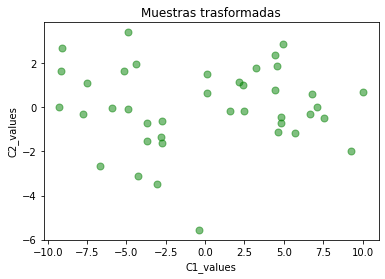

In [ ]:
plt.plot(transformed[:,0], transformed[:,1], 'o', markersize=7, color='green', alpha=0.5)
plt.xlabel('C1_values')
plt.ylabel('C2_values')
plt.title('Muestras trasformadas')
plt.show()

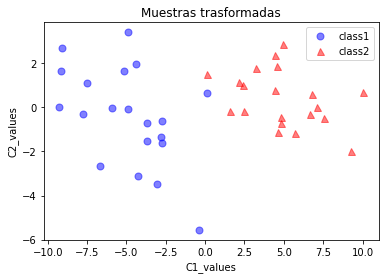

In [ ]:
plt.plot(transformed[0:20,0], transformed[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[20:40,0], transformed[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('C1_values')
plt.ylabel('C2_values')
plt.legend()
plt.title('Muestras trasformadas')

plt.show()

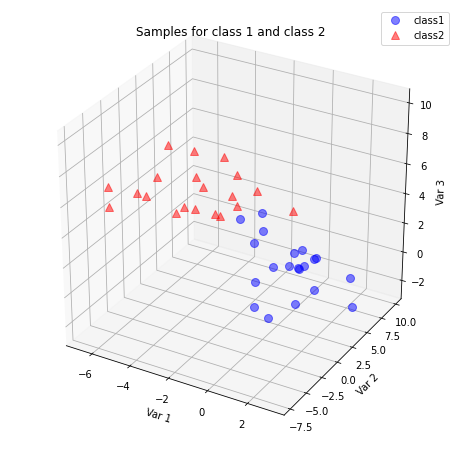

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[:,0], class1_sample[:,1], class1_sample[:,2], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[:,0], class2_sample[:,1], class2_sample[:,2], '^', markersize=8, alpha=0.5, color='red', label='class2')
ax.set_xlabel('Var 1')
ax.set_ylabel('Var 2')
ax.set_zlabel('Var 3')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()